In [1]:
# 패키지
from pyspark import SparkConf, SparkContext
import pandas as pd

In [2]:
# Spark 설정 , master local 설정 , 이름 설정
conf = SparkConf().setMaster("local").setAppName("uber-date-trips")
sc = SparkContext(conf=conf) # conf 초기화

In [3]:
# 데이터가 있는 파일
#directory = "/Users/kimsy/data-engineering/01-spark/data"
directory = "/home/jovyan/work/01-spark/data"
filename = "fhvhv_tripdata_2020-03.csv"

In [4]:
# RDD는 파티셔닝된 원소의 불변적인 분산 컬렉션
lines = sc.textFile(f"file:///{directory}/{filename}") # RDD인 lines객체, 여러 노드에 담겨있지만 lines객체 하나로 로드 가능
header = lines.first() # lines RDD의 첫번째 원소를 header 변수에 저장
filtered_lines = lines.filter(lambda row:row != header) # lines RDD에서 header를 제외한 나머지 원소들만을 포함하는 filtered_lines RDD 생성

In [ ]:
# 필요한 부분만 골라내서 세는 부분 : 지금은 날짜만
# countByValue로 같은 날짜등장하는 부분을 센다
dates = filtered_lines.map(lambda x: x.split(",")[6].split(" ")[0])
result = dates.countByValue()

In [ ]:
# 아래는 Spark코드가 아닌 일반적인 파이썬 코드
# CSV로 결과값 저장 
pd.Series(result, name="trips").to_csv("trips_date.csv")
# pandas 시리즈로 

# 1
# 커맨드 창에서 spark-submit count_trips.py 입력
# 클러스터 매니저에게 작업을 제출하는 명령어로  이 파일이 전달됨
# 연산하는 중에 localhost:4040/jobs 에서 확인 가능
# trips_date.csv 생성 visualize_trips_date.py 로 넘어가서 이어짐
# 날짜별 trip수를 세서 결과값을 낸 것
# visualize_trips_date.py 로 그래프화.

# 예전 데이터와 속성값이 달라진게 있어서 pickup_datetime을 사용해야 한다.

In [ ]:
# 큰 용량의 csv파일을 읽을 수 있게 chunksize 이용
chunk = pd.read_csv('./data/fhvhv_tripdata_2020-03.csv', chunksize = 2000000)
chunk = list(chunk)

In [ ]:
for df in chunk :
    display(df.head(3))

,Unnamed: 0,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,0,HV0005,B02510,NaN,2020-03-01 00:00:12,NaN,2020-03-01 00:03:40,2020-03-01 00:23:39,81,159,...,1.90,0.00,NaN,0.0,19.65,N,N,N,N,N
1,1,HV0005,B02510,NaN,2020-03-01 00:22:03,NaN,2020-03-01 00:28:05,2020-03-01 00:38:57,168,119,...,0.85,0.00,NaN,0.0,9.37,N,N,N,N,N
2,2,HV0003,B02764,B02764,2020-02-29 23:57:45,2020-03-01 00:01:04,2020-03-01 00:03:07,2020-03-01 00:15:04,137,209,...,1.38,2.75,NaN,0.0,16.24,N,Y,,N,N


,Unnamed: 0,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
2000000,2000000,HV0003,B02864,B02864,2020-03-03 20:35:52,2020-03-03 20:37:46,2020-03-03 20:41:19,2020-03-03 20:52:37,94,235,...,0.84,0.00,NaN,0.0,8.18,N,N,,N,N
2000001,2000001,HV0003,B02864,B02864,2020-03-03 20:52:23,2020-03-03 20:52:37,2020-03-03 20:54:43,2020-03-03 21:01:15,235,235,...,0.53,0.00,NaN,0.0,6.42,N,N,,N,N
2000002,2000002,HV0005,B02510,NaN,2020-03-03 20:21:53,NaN,2020-03-03 20:26:22,2020-03-03 20:47:14,79,202,...,2.27,2.75,NaN,0.0,17.57,N,N,N,N,N


,Unnamed: 0,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
4000000,4000000,HV0003,B02764,B02764,2020-03-06 15:33:12,2020-03-06 15:41:28,2020-03-06 15:42:13,2020-03-06 16:25:43,144,50,...,2.38,2.75,NaN,0.0,33.58,N,N,,N,N
4000001,4000001,HV0003,B02872,B02872,2020-03-06 15:19:54,2020-03-06 15:24:21,2020-03-06 15:26:06,2020-03-06 15:42:24,230,237,...,2.41,2.75,NaN,0.0,22.00,N,N,,N,N
4000002,4000002,HV0003,B02872,B02872,2020-03-06 15:38:07,2020-03-06 15:42:24,2020-03-06 15:43:53,2020-03-06 15:54:56,237,236,...,0.74,2.75,NaN,0.0,6.48,N,N,,N,N


,Unnamed: 0,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
6000000,6000000,HV0005,B02510,NaN,2020-03-08 21:20:58,NaN,2020-03-08 21:33:38,2020-03-08 21:46:56,45,255,...,0.66,0.75,NaN,0.0,0.00,Y,N,N,N,Y
6000001,6000001,HV0005,B02510,NaN,2020-03-08 21:42:13,NaN,2020-03-08 21:50:06,2020-03-08 22:07:30,255,37,...,1.32,0.00,NaN,0.0,0.00,Y,N,N,N,Y
6000002,6000002,HV0003,B02880,B02880,2020-03-08 21:17:45,2020-03-08 21:24:53,2020-03-08 21:26:35,2020-03-08 21:48:47,138,170,...,7.65,2.75,NaN,0.0,48.05,N,N,,N,N


,Unnamed: 0,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
8000000,8000000,HV0005,B02510,NaN,2020-03-12 05:29:13,NaN,2020-03-12 05:31:21,2020-03-12 05:43:43,238,246,...,1.34,2.75,NaN,0.0,10.19,N,N,N,N,N
8000001,8000001,HV0005,B02510,NaN,2020-03-12 05:48:23,NaN,2020-03-12 05:54:09,2020-03-12 06:06:51,143,41,...,0.90,0.75,NaN,0.0,0.00,Y,N,N,N,N
8000002,8000002,HV0005,B02510,NaN,2020-03-12 05:20:43,NaN,2020-03-12 05:26:32,2020-03-12 06:00:19,71,234,...,3.07,2.75,NaN,0.0,35.45,N,N,N,N,N


,Unnamed: 0,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
10000000,10000000,HV0003,B02882,B02882,2020-03-15 11:55:56,2020-03-15 12:02:02,2020-03-15 12:03:39,2020-03-15 12:24:26,233,244,...,2.16,2.75,NaN,0.0,20.67,N,N,,N,N
10000001,10000001,HV0005,B02510,NaN,2020-03-15 12:37:44,NaN,2020-03-15 12:40:58,2020-03-15 12:52:57,48,211,...,1.37,2.75,NaN,0.0,9.07,N,N,N,N,N
10000002,10000002,HV0005,B02510,NaN,2020-03-15 12:14:32,NaN,2020-03-15 12:15:32,2020-03-15 12:26:14,237,146,...,1.14,2.75,NaN,0.0,8.86,N,N,N,N,N


,Unnamed: 0,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
12000000,12000000,HV0003,B02883,B02883,2020-03-22 07:09:33,2020-03-22 07:10:54,2020-03-22 07:13:17,2020-03-22 07:23:38,222,177,...,0.86,0.0,NaN,0.0,7.90,N,N,,N,N
12000001,12000001,HV0003,B02883,B02883,2020-03-22 07:28:22,2020-03-22 07:29:54,2020-03-22 07:31:49,2020-03-22 07:47:44,61,255,...,0.78,0.0,NaN,0.0,14.99,N,N,,N,N
12000002,12000002,HV0003,B02877,B02877,2020-03-22 07:45:48,2020-03-22 07:49:49,2020-03-22 07:52:05,2020-03-22 07:54:59,71,85,...,0.64,0.0,NaN,0.0,5.39,N,N,,N,N


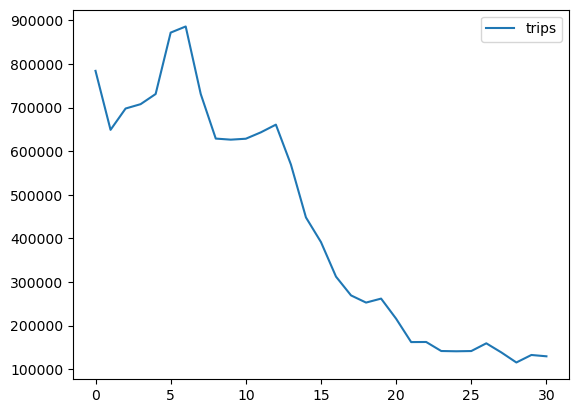

In [ ]:
# 시각화
import pandas as pd
import matplotlib.pyplot as plt

trips = pd.read_csv("trips_date.csv")
trips.plot()
plt.show()

# 3월 데이터인데 2월 29일 데이터가 들어가 있어서 데이터가 튀었다.

In [16]:
# FHVHV 데이터
# 이전엔 RDD, 현재는 스파크 SQL을 이용하여 데이터 분석을 진행
# 스파크 세션 import
from pyspark.sql import SparkSession

# sparkSession 객체 초기화 후 생성
spark = SparkSession.builder.appName("trip_count_sql").getOrCreate()

In [17]:
# 데이터 프레임 생성
data = spark.read.csv("./data/fhvhv_tripdata_2020-03.csv", inferSchema = True, header = True) # 스키마 자동 예측과 헤더 자동 설정


# 데이터 확인
data.show(5)
'''
+---+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|_c0|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+---+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|  0|           HV0005|              B02510|                null|2020-03-01 00:00:12|               null|2020-03-01 00:03:40|2020-03-01 00:23:39|          81|         159|     8.655|     1199|              24.45|  0.0|0.54|      1.9|                 0.0|       null| 0.0|     19.65|                  N|                N|                 N|               N|             N|
|  1|           HV0005|              B02510|                null|2020-03-01 00:22:03|               null|2020-03-01 00:28:05|2020-03-01 00:38:57|         168|         119|     3.523|      652|              11.88|  0.0|0.24|     0.85|                 0.0|       null| 0.0|      9.37|                  N|                N|                 N|               N|             N|
|  2|           HV0003|              B02764|              B02764|2020-02-29 23:57:45|2020-03-01 00:01:04|2020-03-01 00:03:07|2020-03-01 00:15:04|         137|         209|      4.07|      717|              14.57|  0.0|0.38|     1.38|                2.75|       null| 0.0|     16.24|                  N|                Y|                  |               N|             N|
|  3|           HV0003|              B02764|              B02764|2020-03-01 00:04:06|2020-03-01 00:15:48|2020-03-01 00:18:42|2020-03-01 00:38:42|         209|          80|      4.73|     1200|              13.89|  0.0|0.35|     1.23|                0.75|       null| 0.0|     21.76|                  Y|                N|                  |               N|             N|
|  4|           HV0003|              B02764|              B02764|2020-03-01 00:42:46|2020-03-01 00:43:18|2020-03-01 00:44:24|2020-03-01 00:58:44|         256|         226|      4.03|      860|               20.2|  0.0|0.51|     1.79|                 0.0|       null| 0.0|     19.64|                  N|                N|                  |               N|             N|
+---+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
'''

23/04/29 16:23:06 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , hvfhs_license_num, dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, tolls, bcf, sales_tax, congestion_surcharge, airport_fee, tips, driver_pay, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag
 Schema: _c0, hvfhs_license_num, dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, tolls, bcf, sales_tax, congestion_surcharge, airport_fee, tips, driver_pay, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag
Expected: _c0 but found: 
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/fhvhv_tripdata_2020-03.csv
+---+-----------------+--

'\n+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+\n|hvfhs_license_num|dispatching_base_num|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|SR_Flag|\n+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+\n|           HV0005|              B02510|2020-03-01 00:03:40|2020-03-01 00:23:39|          81|         159|   null|\n|           HV0005|              B02510|2020-03-01 00:28:05|2020-03-01 00:38:57|         168|         119|   null|\n|           HV0003|              B02764|2020-03-01 00:03:07|2020-03-01 00:15:04|         137|         209|      1|\n|           HV0003|              B02764|2020-03-01 00:18:42|2020-03-01 00:38:42|         209|          80|   null|\n|           HV0003|              B02764|2020-03-01 00:44:24|2020-03-01 00:58:44|         256|         226|   null|\n+-----------------+--------------------+-------------------+---------

In [18]:
# createOrReplaceTempView는 Spark DataFrame을 임시적으로 SQL 테이블로 만들어 주는 메서드
# 이 메서드를 사용하여 DataFrame을 등록하면 SQL 쿼리를 사용하여 데이터를 분석하거나 변환할 수 있음
data.createOrReplaceTempView("mobility_data")

In [19]:
spark.sql("SELECT * FROM mobility_data LIMIT 5").show()
'''
+---+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|_c0|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+---+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|  0|           HV0005|              B02510|                null|2020-03-01 00:00:12|               null|2020-03-01 00:03:40|2020-03-01 00:23:39|          81|         159|     8.655|     1199|              24.45|  0.0|0.54|      1.9|                 0.0|       null| 0.0|     19.65|                  N|                N|                 N|               N|             N|
|  1|           HV0005|              B02510|                null|2020-03-01 00:22:03|               null|2020-03-01 00:28:05|2020-03-01 00:38:57|         168|         119|     3.523|      652|              11.88|  0.0|0.24|     0.85|                 0.0|       null| 0.0|      9.37|                  N|                N|                 N|               N|             N|
|  2|           HV0003|              B02764|              B02764|2020-02-29 23:57:45|2020-03-01 00:01:04|2020-03-01 00:03:07|2020-03-01 00:15:04|         137|         209|      4.07|      717|              14.57|  0.0|0.38|     1.38|                2.75|       null| 0.0|     16.24|                  N|                Y|                  |               N|             N|
|  3|           HV0003|              B02764|              B02764|2020-03-01 00:04:06|2020-03-01 00:15:48|2020-03-01 00:18:42|2020-03-01 00:38:42|         209|          80|      4.73|     1200|              13.89|  0.0|0.35|     1.23|                0.75|       null| 0.0|     21.76|                  Y|                N|                  |               N|             N|
|  4|           HV0003|              B02764|              B02764|2020-03-01 00:42:46|2020-03-01 00:43:18|2020-03-01 00:44:24|2020-03-01 00:58:44|         256|         226|      4.03|      860|               20.2|  0.0|0.51|     1.79|                 0.0|       null| 0.0|     19.64|                  N|                N|                  |               N|             N|
+---+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
'''



23/04/29 16:56:27 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , hvfhs_license_num, dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, tolls, bcf, sales_tax, congestion_surcharge, airport_fee, tips, driver_pay, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag
 Schema: _c0, hvfhs_license_num, dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, tolls, bcf, sales_tax, congestion_surcharge, airport_fee, tips, driver_pay, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag
Expected: _c0 but found: 
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/fhvhv_tripdata_2020-03.csv
+---+-----------------+--

'\n'

In [20]:
# 일별 트립 수
spark.sql("SELECT pickup_date, COUNT(*) AS trips FROM (SELECT split(pickup_datetime, ' ')[0] AS pickup_date FROM mobility_data) GROUP BY pickup_date ").show()
'''
+-----------+------+
|pickup_date| trips|
+-----------+------+
| 2020-03-02|648990|
| 2020-03-01|784260|
| 2020-03-03|697880|
| 2020-03-04|707879|
| 2020-03-05|731165|
| 2020-03-06|872012|
| 2020-03-07|886071|
| 2020-03-08|731222|
| 2020-03-09|628940|
| 2020-03-10|626474|
| 2020-03-11|628601|
| 2020-03-12|643257|
| 2020-03-13|660914|
| 2020-03-15|448125|
| 2020-03-14|569397|
| 2020-03-16|391518|
| 2020-03-17|312298|
| 2020-03-20|261900|
| 2020-03-19|252773|
| 2020-03-18|269233|
+-----------+------+
only showing top 20 rows
'''

+-----------+------+
|pickup_date| trips|
+-----------+------+
| 2020-03-02|648990|
| 2020-03-01|784260|
| 2020-03-03|697880|
| 2020-03-04|707879|
| 2020-03-05|731165|
| 2020-03-06|872012|
| 2020-03-07|886071|
| 2020-03-08|731222|
| 2020-03-09|628940|
| 2020-03-10|626474|
| 2020-03-11|628601|
| 2020-03-12|643257|
| 2020-03-13|660914|
| 2020-03-15|448125|
| 2020-03-14|569397|
| 2020-03-16|391518|
| 2020-03-17|312298|
| 2020-03-20|261900|
| 2020-03-19|252773|
| 2020-03-18|269233|
+-----------+------+
only showing top 20 rows



'\n+-----------+------+\n|pickup_date| trips|\n+-----------+------+\n| 2020-03-02|648986|\n| 2020-03-01|784246|\n| 2020-03-03|697880|\n| 2020-03-04|707879|\n| 2020-03-05|731165|\n| 2020-03-06|872012|\n| 2020-03-07|886071|\n| 2020-03-08|731222|\n| 2020-03-10|626474|\n| 2020-03-09|628940|\n| 2020-03-11|628601|\n| 2020-03-12|643257|\n| 2020-03-13|660914|\n| 2020-03-15|448125|\n| 2020-03-14|569397|\n| 2020-03-16|391518|\n| 2020-03-17|312298|\n| 2020-03-18|269232|\n| 2020-03-20|261900|\n| 2020-03-24|141686|\n+-----------+------+\n'

sparkSession을 이용하면 맨 위의 RDD보다는 간편하게 해결 및 처리 가능


RDD는 저수준의 데이터 처리와 복잡한 계산에 선호되는 반면, SparkSession은 구조화된 데이터 처리와 검색, 분석 쿼리 및 최적화에 더 강점. 

요구사항에 따라 적절한 방식을 선택하는 것이 중요



이제는 각 행정구 별 데이터를 확인해보자


## 각 헹정구 별 데이터
TLC Trip Record Data - Taxi Zone Lookup Table CSV 파일을 다운로드
로케이션 아이디의 정보가 담겨있는 파일이다. 조인하여 분석

In [21]:
from pyspark.sql import SparkSession

In [22]:
spark = SparkSession.builder.appName("trip_count_by_zone_sql").getOrCreate()

23/04/29 17:21:34 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [24]:
trip_data = spark.read.csv("./data/fhvhv_tripdata_2020-03.csv", inferSchema = True, header = True)
zone_data = spark.read.csv("./data/taxi+_zone_lookup.csv", inferSchema = True, header = True)


In [25]:
trip_data.createOrReplaceTempView("trip_data")
zone_data.createOrReplaceTempView("zone_data")

In [26]:
# 행정구 별 승차하는 승객
spark.sql('SELECT borough, COUNT(*) FROM\
            (SELECT zone_data.Borough AS borough\
            FROM trip_data\
            JOIN zone_data ON trip_data.PULocationID = zone_data.LocationID)\
        GROUP BY borough').show()
'''
+-------------+--------+
|      borough|count(1)|
+-------------+--------+
|       Queens| 2437394|
|          EWR|     362|
|      Unknown|     845|
|     Brooklyn| 3735765|
|Staten Island|  178818|
|    Manhattan| 4953147|
|        Bronx| 2086597|
+-------------+--------+
'''

+-------------+--------+
|      borough|count(1)|
+-------------+--------+
|       Queens| 2437394|
|          EWR|     362|
|      Unknown|     845|
|     Brooklyn| 3735765|
|Staten Island|  178818|
|    Manhattan| 4953147|
|        Bronx| 2086597|
+-------------+--------+



'\n'

In [27]:
# 행정구 별 하차하는 승객을 구해본다.
spark.sql('SELECT borough, COUNT(*) FROM\
            (SELECT zone_data.Borough AS borough\
            FROM trip_data\
            JOIN zone_data ON trip_data.PULocationID = zone_data.LocationID)\
        GROUP BY borough').show()
'''
+-------------+--------+
|      borough|count(1)|
+-------------+--------+
|       Queens| 2437394|
|          EWR|     362|
|      Unknown|     845|
|     Brooklyn| 3735765|
|Staten Island|  178818|
|    Manhattan| 4953147|
|        Bronx| 2086597|
+-------------+--------+
'''

+-------------+--------+
|      borough|count(1)|
+-------------+--------+
|       Queens| 2437394|
|          EWR|     362|
|      Unknown|     845|
|     Brooklyn| 3735765|
|Staten Island|  178818|
|    Manhattan| 4953147|
|        Bronx| 2086597|
+-------------+--------+



승차든 하차든 맨해튼의 수가 굉장히 많은 걸 볼 수있다.



본격적으로 택시 요금 예측 머신 러닝에 쓰일 데이터를 분석한다.


뉴욕의 택시 데이터 TLC Trip Record Data - 2021년 1월부터 7월까지의 ‘Yellow Taxi Trip Records’ CSV파일을 다운


In [28]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("taxi-analysis").getOrCreate()

trips_df = spark.read.csv("./data/trips/*", inferSchema=True, header=True) # 여러개 파일 동시에
zone_df = spark.read.csv("./data/taxi+_zone_lookup.csv", inferSchema=True, header=True)

23/04/29 17:37:57 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [32]:
trips_df.createOrReplaceTempView("trips")
zone_df.createOrReplaceTempView("zone")

In [33]:
trips_df.printSchema()
zone_df.printSchema()
'''
root
 |-- _c0: string (nullable = true)
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)
 |-- airport_fee: double (nullable = true)

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zone: string (nullable = true)
'''

root
 |-- _c0: string (nullable = true)
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)
 |-- airport_fee: double (nullable = true)

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: str

'\nroot\n |-- _c0: string (nullable = true)\n |-- VendorID: string (nullable = true)\n |-- tpep_pickup_datetime: string (nullable = true)\n |-- tpep_dropoff_datetime: string (nullable = true)\n |-- passenger_count: string (nullable = true)\n |-- trip_distance: string (nullable = true)\n |-- RatecodeID: string (nullable = true)\n |-- store_and_fwd_flag: string (nullable = true)\n |-- PULocationID: string (nullable = true)\n |-- DOLocationID: string (nullable = true)\n |-- payment_type: string (nullable = true)\n |-- fare_amount: string (nullable = true)\n |-- extra: string (nullable = true)\n |-- mta_tax: string (nullable = true)\n |-- tip_amount: string (nullable = true)\n |-- tolls_amount: string (nullable = true)\n |-- improvement_surcharge: string (nullable = true)\n |-- total_amount: string (nullable = true)\n |-- congestion_surcharge: string (nullable = true)\n |-- airport_fee: double (nullable = true)\n\nroot\n |-- LocationID: integer (nullable = true)\n |-- Borough: string (null

In [37]:
# 불러온 두 데이터 프레임을 조인하고, 필요한 컬럼만 선택
query = """
select
    t.VendorID as vendor_id,
    TO_DATE(t.tpep_pickup_datetime) as pickup_date,
    TO_DATE(t.tpep_dropoff_datetime) as dropoff_date,
    HOUR(t.tpep_pickup_datetime) as pickup_time,
    HOUR(t.tpep_dropoff_datetime) as dropoff_time,
    t.passenger_count,
    t.trip_distance,
    t.fare_amount,
    t.tip_amount,
    t.tolls_amount,
    t.total_amount,
    t.payment_type,
    pz.Zone as pickup_zone,
    dz.Zone as dropoff_zone
from
    trips t
    left join
        zone pz
    on
        t.PULocationID = pz.LocationID
    left join
        zone dz
    on
        t.DOLocationID = dz.LocationID
"""

comb_df = spark.sql(query)

In [38]:
# 새로운 TempView에 담는다.
comb_df.createOrReplaceTempView("comb")

In [39]:
comb_df.printSchema()
'''
root
 |-- vendor_id: string (nullable = true)
 |-- pickup_date: date (nullable = true)
 |-- dropoff_date: date (nullable = true)
 |-- pickup_time: integer (nullable = true)
 |-- dropoff_time: integer (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- pickup_zone: string (nullable = true)
 |-- dropoff_zone: string (nullable = true)
'''

root
 |-- vendor_id: string (nullable = true)
 |-- pickup_date: date (nullable = true)
 |-- dropoff_date: date (nullable = true)
 |-- pickup_time: integer (nullable = true)
 |-- dropoff_time: integer (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- pickup_zone: string (nullable = true)
 |-- dropoff_zone: string (nullable = true)



'\nroot\n |-- vendor_id: string (nullable = true)\n |-- pickup_date: date (nullable = true)\n |-- dropoff_date: date (nullable = true)\n |-- pickup_time: integer (nullable = true)\n |-- dropoff_time: integer (nullable = true)\n |-- passenger_count: string (nullable = true)\n |-- trip_distance: string (nullable = true)\n |-- fare_amount: string (nullable = true)\n |-- tip_amount: string (nullable = true)\n |-- tolls_amount: string (nullable = true)\n |-- total_amount: string (nullable = true)\n |-- payment_type: string (nullable = true)\n |-- pickup_zone: string (nullable = true)\n |-- dropff_zone: string (nullable = true)\n'

In [40]:
# 이상한 데이터가 있는 지 확인한다.
spark.sql("SELECT pickup_date, pickup_time FROM comb WHERE pickup_date < '2020-12-31'").show()
'''
+-----------+-----------+
|pickup_date|pickup_time|
+-----------+-----------+
| 2009-01-01|          0|
| 2008-12-31|         23|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2008-12-31|         23|
| 2008-12-31|         23|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|         10|
| 2009-01-01|         17|
| 2009-01-01|         17|
| 2009-01-01|         18|
| 2009-01-01|          1|
| 2009-01-01|          1|
| 2009-01-01|          2|
| 2009-01-01|          2|
| 2009-01-01|          0|
+-----------+-----------+
'''
# 2021년 1월부터 7월까지의 데이터인데 옛날 데이터가 있다.

23/04/29 18:01:48 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, DOLocationID, payment_type
 Schema: tpep_pickup_datetime, PULocationID, DOLocationID
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-02.csv


23/04/29 18:01:50 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, DOLocationID, payment_type
 Schema: tpep_pickup_datetime, PULocationID, DOLocationID
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-03.csv


23/04/29 18:01:52 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, DOLocationID, payment_type
 Schema: tpep_pickup_datetime, PULocationID, DOLocationID
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-04.csv


23/04/29 18:01:54 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, DOLocationID, payment_type
 Schema: tpep_pickup_datetime, PULocationID, DOLocationID
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-05.csv
+-----------+-----------+
|pickup_date|pickup_time|
+-----------+-----------+
| 2009-01-01|          0|
| 2008-12-31|         23|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2008-12-31|         23|
| 2008-12-31|         23|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|         10|
| 2009-01-01|         17|
| 2009-01-01|         17|
| 2009-01-01|         18|
| 2009-01-01|          1|
| 2009-01-01|          1|
| 2009-01-01|          2|
| 2009-01-01|          2|
| 2009-01-01|          0|
+-----------+-----------+
only showing top

'\n+-----------+-----------+\n|pickup_date|pickup_time|\n+-----------+-----------+\n| 2009-01-01|          0|\n| 2008-12-31|         23|\n| 2009-01-01|          0|\n| 2009-01-01|          0|\n| 2009-01-01|          0|\n| 2008-12-31|         23|\n| 2008-12-31|         23|\n| 2009-01-01|          0|\n| 2009-01-01|          0|\n| 2009-01-01|          0|\n| 2009-01-01|          0|\n| 2009-01-01|          1|\n| 2009-01-01|         17|\n| 2009-01-01|         17|\n| 2009-01-01|         18|\n| 2009-01-01|          1|\n| 2009-01-01|          1|\n| 2009-01-01|          2|\n| 2009-01-01|          2|\n| 2009-01-01|          0|\n+-----------+-----------+\n'

In [41]:
# 요금의 요약 확인
# total_amount 컬럼에 대한 통계를 반환한다. describe
comb_df.select("total_amount").describe().show()
'''
+-------+------------------+
|summary|      total_amount|
+-------+------------------+
|  count|          14265260|
|   mean|3.7378463056558773|
| stddev| 6.424498387076673|
|    min|             -0.35|
|    max|             99.96|
+-------+------------------+
'''
# 금액인데 음수는 못받은 금액인가? 최대값은 원화로 13만원정도 한다.

23/04/29 18:04:21 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: DOLocationID, payment_type, congestion_surcharge
 Schema: PULocationID, DOLocationID, total_amount
Expected: PULocationID but found: DOLocationID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-02.csv


23/04/29 18:04:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: DOLocationID, payment_type, congestion_surcharge
 Schema: PULocationID, DOLocationID, total_amount
Expected: PULocationID but found: DOLocationID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-03.csv


23/04/29 18:04:27 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: DOLocationID, payment_type, congestion_surcharge
 Schema: PULocationID, DOLocationID, total_amount
Expected: PULocationID but found: DOLocationID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-04.csv


23/04/29 18:04:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: DOLocationID, payment_type, congestion_surcharge
 Schema: PULocationID, DOLocationID, total_amount
Expected: PULocationID but found: DOLocationID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-05.csv


23/04/29 18:04:33 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: DOLocationID, payment_type, congestion_surcharge
 Schema: PULocationID, DOLocationID, total_amount
Expected: PULocationID but found: DOLocationID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-06.csv


23/04/29 18:04:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: DOLocationID, payment_type, congestion_surcharge
 Schema: PULocationID, DOLocationID, total_amount
Expected: PULocationID but found: DOLocationID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-07.csv


+-------+------------------+
|summary|      total_amount|
+-------+------------------+
|  count|          14265260|
|   mean|3.7378463056558773|
| stddev| 6.424498387076673|
|    min|             -0.35|
|    max|             99.96|
+-------+------------------+



'\n+-------+------------------+\n|summary|      total_amount|\n+-------+------------------+\n|  count|          15000700|\n|   mean| 18.75545205706905|\n| stddev|145.74424528059743|\n|    min|            -647.8|\n|    max|          398469.2|\n+-------+------------------+\n'

In [43]:
comb_df.select("trip_distance").describe().show()
'''
+-------+------------------+
|summary|     trip_distance|
+-------+------------------+
|  count|          14265260|
|   mean|1.3902634392923723|
| stddev|122.06692195114893|
|    min|               0.0|
|    max|              99.0|
+-------+------------------+
'''
# 최대값은 159km이다.

23/04/29 18:08:21 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: RatecodeID, DOLocationID, payment_type
 Schema: trip_distance, PULocationID, DOLocationID
Expected: trip_distance but found: RatecodeID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-02.csv


23/04/29 18:08:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: RatecodeID, DOLocationID, payment_type
 Schema: trip_distance, PULocationID, DOLocationID
Expected: trip_distance but found: RatecodeID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-03.csv


23/04/29 18:08:26 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: RatecodeID, DOLocationID, payment_type
 Schema: trip_distance, PULocationID, DOLocationID
Expected: trip_distance but found: RatecodeID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-04.csv


23/04/29 18:08:29 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: RatecodeID, DOLocationID, payment_type
 Schema: trip_distance, PULocationID, DOLocationID
Expected: trip_distance but found: RatecodeID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-05.csv


23/04/29 18:08:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: RatecodeID, DOLocationID, payment_type
 Schema: trip_distance, PULocationID, DOLocationID
Expected: trip_distance but found: RatecodeID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-06.csv


23/04/29 18:08:37 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: RatecodeID, DOLocationID, payment_type
 Schema: trip_distance, PULocationID, DOLocationID
Expected: trip_distance but found: RatecodeID
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-07.csv


+-------+------------------+
|summary|     trip_distance|
+-------+------------------+
|  count|          14265260|
|   mean|1.3902634392923723|
| stddev|122.06692195114893|
|    min|               0.0|
|    max|              99.0|
+-------+------------------+



'\n+-------+-----------------+\n|summary|    trip_distance|\n+-------+-----------------+\n|  count|         15000700|\n|   mean|6.628629402627825|\n| stddev|671.7293482115845|\n|    min|              0.0|\n|    max|        332541.19|\n+-------+-----------------+\n'

In [44]:
comb_df.select("passenger_count").describe().show()
'''
+-------+-----------------+
|summary|  passenger_count|
+-------+-----------------+
|  count|         14902584|
|   mean|6.366977958319179|
| stddev|663.2733567444556|
|    min|              0.0|
|    max|         99844.81|
+-------+-----------------+
'''
#승객 수 택시에 99844명은 이상치인듯

23/04/29 18:12:27 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: trip_distance, DOLocationID, payment_type
 Schema: passenger_count, PULocationID, DOLocationID
Expected: passenger_count but found: trip_distance
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-02.csv


23/04/29 18:12:29 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: trip_distance, DOLocationID, payment_type
 Schema: passenger_count, PULocationID, DOLocationID
Expected: passenger_count but found: trip_distance
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-03.csv


23/04/29 18:12:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: trip_distance, DOLocationID, payment_type
 Schema: passenger_count, PULocationID, DOLocationID
Expected: passenger_count but found: trip_distance
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-04.csv


23/04/29 18:12:35 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: trip_distance, DOLocationID, payment_type
 Schema: passenger_count, PULocationID, DOLocationID
Expected: passenger_count but found: trip_distance
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-05.csv


23/04/29 18:12:38 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: trip_distance, DOLocationID, payment_type
 Schema: passenger_count, PULocationID, DOLocationID
Expected: passenger_count but found: trip_distance
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-06.csv


23/04/29 18:12:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: trip_distance, DOLocationID, payment_type
 Schema: passenger_count, PULocationID, DOLocationID
Expected: passenger_count but found: trip_distance
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-07.csv


+-------+-----------------+
|summary|  passenger_count|
+-------+-----------------+
|  count|         14902584|
|   mean|6.366977958319179|
| stddev|663.2733567444556|
|    min|              0.0|
|    max|         99844.81|
+-------+-----------------+



'\n+-------+------------------+\n|summary|   passenger_count|\n+-------+------------------+\n|  count|          14166672|\n|   mean|1.4253783104458126|\n| stddev|1.0443270490596768|\n|    min|                 0|\n|    max|                 9|\n+-------+------------------+\n'

In [45]:
# 월 단위로 데이터를 그룹핑하여 확인한다.
query = """
SELECT
     DATE_TRUNC('MM', c.pickup_date) AS month,
     COUNT(*) AS trips
FROM
    comb c
GROUP BY
    month
ORDER BY
    month desc
"""
spark.sql(query).show()
'''
+-------------------+-------+
|              month|  trips|
+-------------------+-------+
|2029-05-01 00:00:00|      1|
|2021-12-01 00:00:00|      5|
|2021-11-01 00:00:00|      5|
|2021-10-01 00:00:00|      3|
|2021-09-01 00:00:00|      3|
|2021-08-01 00:00:00|   1159|
|2021-07-01 00:00:00|2821299|
|2021-06-01 00:00:00|2833939|
|2021-05-01 00:00:00|2507419|
|2021-04-01 00:00:00|2170653|
|2021-03-01 00:00:00|1925076|
|2021-02-01 00:00:00|1371472|
|2021-01-01 00:00:00|1369746|
|2020-12-01 00:00:00|     16|
|2009-01-01 00:00:00|    120|
|2008-12-01 00:00:00|     17|
|2004-04-01 00:00:00|      1|
|2003-01-01 00:00:00|      2|
+-------------------+-------+
'''
# 1월부터 7월 외의 데이터를 삭제

23/04/29 18:37:54 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, DOLocationID, payment_type
 Schema: tpep_pickup_datetime, PULocationID, DOLocationID
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-02.csv
23/04/29 18:37:56 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, DOLocationID, payment_type
 Schema: tpep_pickup_datetime, PULocationID, DOLocationID
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-03.csv


23/04/29 18:37:59 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, DOLocationID, payment_type
 Schema: tpep_pickup_datetime, PULocationID, DOLocationID
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-04.csv
23/04/29 18:38:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, DOLocationID, payment_type
 Schema: tpep_pickup_datetime, PULocationID, DOLocationID
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-05.csv


23/04/29 18:38:04 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, DOLocationID, payment_type
 Schema: tpep_pickup_datetime, PULocationID, DOLocationID
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-06.csv


23/04/29 18:38:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, DOLocationID, payment_type
 Schema: tpep_pickup_datetime, PULocationID, DOLocationID
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-07.csv


+-------------------+-------+
|              month|  trips|
+-------------------+-------+
|2029-05-01 00:00:00|      1|
|2021-12-01 00:00:00|      5|
|2021-11-01 00:00:00|      5|
|2021-10-01 00:00:00|      3|
|2021-09-01 00:00:00|      3|
|2021-08-01 00:00:00|   1159|
|2021-07-01 00:00:00|2821299|
|2021-06-01 00:00:00|2833939|
|2021-05-01 00:00:00|2507419|
|2021-04-01 00:00:00|2170653|
|2021-03-01 00:00:00|1925076|
|2021-02-01 00:00:00|1371472|
|2021-01-01 00:00:00|1369746|
|2020-12-01 00:00:00|     16|
|2009-01-01 00:00:00|    120|
|2008-12-01 00:00:00|     17|
|2004-04-01 00:00:00|      1|
|2003-01-01 00:00:00|      2|
+-------------------+-------+



'\n'

In [46]:
# 데이터 정제 , 위 통계들을 이용해서 이상치들을 제거
# 대충 자료를 확인했으니 유의미한 범위만 가져오기 위해 DATA Clearning 을 해준다.

query = """
SELECT
    *
FROM 
    comb c
WHERE
    c.total_amount > 0
    AND c.trip_distance < 100
    AND c.passenger_count < 5
    AND c.pickup_date >= '2021-01-01'
    AND c.pickup_date < '2021-08-01'
"""
cleaned_df = spark.sql(query)
cleaned_df.createOrReplaceTempView("cleaned")


cleaned_df.describe().show()
'''
+-------+-------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+
|summary|          vendor_id|       pickup_time|      dropoff_time|   passenger_count|    trip_distance|       fare_amount|         tip_amount|       tolls_amount|      total_amount|      payment_type|         pickup_zone|        dropoff_zone|
+-------+-------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+
|  count|           11821511|          11821511|           1207792|          11821511|         11821511|          11821511|           11821511|           11821511|          11821511|          11821511|            11821511|            11821511|
|   mean| 1.6606874362473008|14.320304739385683|13.957014121636838|1.7486229594507765|1.170961178312989|2.1184719719838716|0.20960711283022165|0.28784998550034613|3.9400282544425504|  8.38238407340652|                null|                null|
| stddev| 0.4734762226801657| 5.021311638066726| 4.571248107620885|  1.03512014835337|1.277289637767977| 5.015180451746538|  1.009722519592428|0.49760347218856144| 6.114919610965124|116.00249783370542|                null|                null|
|    min|                  1|                 0|                 0|               0.0|              0.0|               0.0|                0.0|                0.0|              1.11|               0.0|Allerton/Pelham G...|Allerton/Pelham G...|
|    max|2021-07-31 23:58:04|                23|                23|              4.99|             99.0|              99.5|               99.0|                9.5|             99.96|              99.0|      Yorkville West|      Yorkville West|
+-------+-------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+
'''

23/04/29 18:43:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, tolls_amount, improvement_surcharge, congestion_surcharge
 Schema: VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, tip_amount, tolls_amount, total_amount
Expected: VendorID but found: tpep_pickup_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-02.csv


23/04/29 18:44:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, tolls_amount, improvement_surcharge, congestion_surcharge
 Schema: VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, tip_amount, tolls_amount, total_amount
Expected: VendorID but found: tpep_pickup_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-03.csv


23/04/29 18:45:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, tolls_amount, improvement_surcharge, congestion_surcharge
 Schema: VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, tip_amount, tolls_amount, total_amount
Expected: VendorID but found: tpep_pickup_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-04.csv


23/04/29 18:46:27 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, tolls_amount, improvement_surcharge, congestion_surcharge
 Schema: VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, tip_amount, tolls_amount, total_amount
Expected: VendorID but found: tpep_pickup_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-05.csv


23/04/29 18:47:27 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, tolls_amount, improvement_surcharge, congestion_surcharge
 Schema: VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, tip_amount, tolls_amount, total_amount
Expected: VendorID but found: tpep_pickup_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-06.csv


23/04/29 18:49:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, tolls_amount, improvement_surcharge, congestion_surcharge
 Schema: VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, tip_amount, tolls_amount, total_amount
Expected: VendorID but found: tpep_pickup_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-07.csv


+-------+-------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+
|summary|          vendor_id|       pickup_time|      dropoff_time|   passenger_count|    trip_distance|       fare_amount|         tip_amount|       tolls_amount|      total_amount|      payment_type|         pickup_zone|        dropoff_zone|
+-------+-------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+
|  count|           11821511|          11821511|           1207792|          11821511|         11821511|          11821511|           11821511|           11821511|          11821511|          11821511|            11821511|            11821511|
|   mean| 1.660687436247

'\n+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+--------------------+\n|summary|          vendor_id|       pickup_time|      dropoff_time|   passenger_count|     trip_distance|       fare_amount|        tip_amount|       tolls_amount|      total_amount|      payment_type|         pickup_zone|        dropoff_zone|\n+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+--------------------+\n|  count|           13297107|          13297107|          13297107|          13297107|          13297107|          13297107|          13297107|           13297107|          13297107|          13297107|            13297107|            13297107|\n|   mean| 1.67088

In [47]:
#분석 및 시각화
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


23/04/29 18:56:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-02.csv


23/04/29 18:56:06 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-03.csv


23/04/29 18:56:09 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-04.csv


23/04/29 18:56:12 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-05.csv


23/04/29 18:56:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-06.csv


23/04/29 18:56:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-07.csv


<AxesSubplot:xlabel='pickup_date', ylabel='trips'>

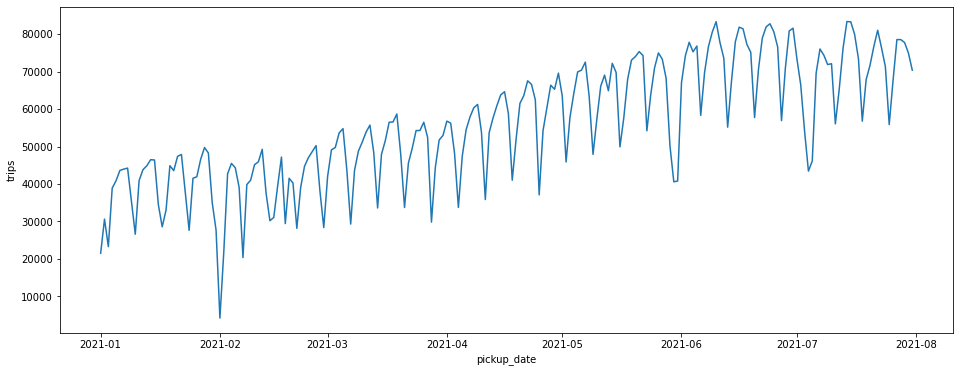

In [48]:
#일 별 운행 수
query = """
SELECT 
    c.pickup_date,
    COUNT(*) AS trips
FROM
    cleaned c
GROUP BY
    c.pickup_date
"""
pd_df = spark.sql(query).toPandas() # 그래프를 그려야하기 때문에 판다스로 보낸다.

fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x="pickup_date", y="trips", data=pd_df)
# 코로나 완화로 인한 승객수 증가, 중간에 하락하는 구간으로 위클리 패턴 존재 확인


In [49]:
#요일 별 운행 수
query = """
SELECT 
    c.pickup_date,
    DATE_FORMAT(c.pickup_date, 'EEEE') AS day_of_week,
    COUNT(*) AS trips
FROM
    cleaned c
GROUP BY
    c.pickup_date,
    day_of_week
"""
pd_df2 = spark.sql(query).toPandas()

# 요일 별 정렬을 위해 컬럼을 하나 만든다.
data = pd_df2.groupby("day_of_week").trips.median().to_frame().reset_index()
data["sort_dow"] = data["day_of_week"].replace({
    "Sunday": 0,
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
})


data.sort_values(by="sort_dow", inplace=True)
data

23/04/29 18:58:51 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-02.csv


23/04/29 18:58:54 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-03.csv


23/04/29 18:58:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-04.csv


23/04/29 18:59:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-05.csv


23/04/29 18:59:05 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-06.csv


23/04/29 18:59:12 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-07.csv


,day_of_week,trips,sort_dow
3,Sunday,36477.0,0
1,Monday,47635.0,1
5,Tuesday,58977.5,2
6,Wednesday,62219.0,3
4,Thursday,64314.0,4
0,Friday,64613.0,5
2,Saturday,53815.0,6


<AxesSubplot:xlabel='day_of_week', ylabel='trips'>

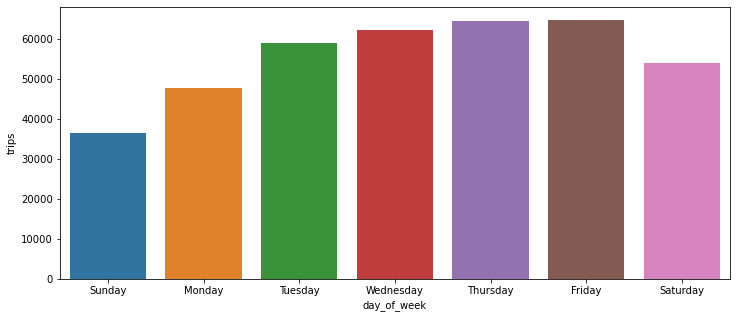

In [50]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(
    x="day_of_week",
    y="trips",
    data=data
)
# 확실히 주말보다 평일이 택시 운행량이 많은 것을 확인할 수 있다.
# 일요일이 가장 적고, 금요일이 가장 많다.


In [51]:
# 요일 생성 함수 생성 - 위 쿼리를 사용해도 되지만 함수를 이런식으로 만들 수도 있다.
def get_weekday(data):
    import calendar
    return calendar.day_name[date.weekday()]

spark.udf.register("get_weekday", get_weekday)


query = """
SELECT 
    c.pickup_date,
    get_weekday(c.pickup_date) AS day_of_week,
    COUNT(*) AS trips
FROM
    cleaned c
GROUP BY
    c.pickup_date,
    day_of_week
"""

In [71]:
# 결제 타입 패턴
payment_type_to_string = {
    '1': "Credit Card",
    '2': "Cash",
    '3': "No Charge",
    '4': "Dispute",     # 분쟁O
    '5': "Unknown",
    '6': "Voided Trip", # 취소
}
def parse_payment_type(payment_type):
    if payment_type not in payment_type_to_string.keys():
        return 'what is it'
    else:
        return payment_type_to_string[payment_type]
        

spark.udf.register("parse_payment_type", parse_payment_type)

23/04/29 19:23:47 WARN SimpleFunctionRegistry: The function parse_payment_type replaced a previously registered function.


<function __main__.parse_payment_type(payment_type)>

In [72]:
query = """
SELECT 
    parse_payment_type(payment_type),
    count(*) AS trips,
    MEAN(fare_amount) AS mean_fare_amount,
    STD(fare_amount) AS stdev_fare_amount
FROM
    cleaned
GROUP BY
    payment_type
"""

spark.sql(query).show()

# 다른 타입의 결제가 많아졌다. 8.5 2.5 20.5 등등 what is it으로 해놨지만 나중에 분석해봐야 함
'''
+--------------------------------+------+-------------------+-------------------+
|parse_payment_type(payment_type)| trips|   mean_fare_amount|  stdev_fare_amount|
+--------------------------------+------+-------------------+-------------------+
|                       No Charge|  6009|  11.86247295723082| 13.577613535628362|
|                     Credit Card|893052| 11.116093889269976| 12.372173998030021|
|                         Dispute|  2159| 11.857684113015283| 13.503121648843592|
|                            Cash|306572| 11.179399390681466| 10.469515001357696|
|                      what is it|540871|   1.08654370450625| 1.2279266562554154|
|                      what is it| 19629|  1.129950583320597| 1.2572398257375212|
|                      what is it|     9| 1.9444444444444444|  1.726529112925055|
|                      what is it|     9|                0.0|                0.0|
|                      what is it|    39| 1.7371794871794872| 1.5206351663176265|
|                      what is it|     3|                0.0|                0.0|
|                      what is it|     3|                0.0|                0.0|
|                      what is it|   960|          1.3140625| 1.2820693957855833|
|                      what is it|     1|                0.0|               null|
|                      what is it|    49|0.05102040816326531|0.35714285714285715|
|                      what is it|    42|0.17857142857142858| 0.6516529505375165|
|                      what is it|     1|                0.0|               null|
|                      what is it|     2|                0.0|                0.0|
|                      what is it|     6| 0.5833333333333334| 1.4288690166235207|
|                      what is it|   305|0.04426229508196721| 0.3519329099135822|
|                      what is it|    67|                0.0|                0.0|
+--------------------------------+------+-------------------+-------------------+
'''

23/04/29 19:23:53 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-02.csv


23/04/29 19:23:57 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-03.csv


23/04/29 19:24:00 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-04.csv


23/04/29 19:24:04 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-05.csv


23/04/29 19:24:07 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-06.csv


23/04/29 19:24:14 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: tpep_dropoff_datetime, trip_distance, RatecodeID, DOLocationID, payment_type, fare_amount, extra, congestion_surcharge
 Schema: tpep_pickup_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, total_amount
Expected: tpep_pickup_datetime but found: tpep_dropoff_datetime
CSV file: file:///Users/kimsy/data-engineering/01-spark/data/trips/yellow_tripdata_2021-07.csv


+--------------------------------+------+-------------------+-------------------+
|parse_payment_type(payment_type)| trips|   mean_fare_amount|  stdev_fare_amount|
+--------------------------------+------+-------------------+-------------------+
|                       No Charge|  6009|  11.86247295723082| 13.577613535628362|
|                     Credit Card|893052| 11.116093889269976| 12.372173998030021|
|                         Dispute|  2159| 11.857684113015283| 13.503121648843592|
|                            Cash|306572| 11.179399390681466| 10.469515001357696|
|                      what is it|540871|   1.08654370450625| 1.2279266562554154|
|                      what is it| 19629|  1.129950583320597| 1.2572398257375212|
|                      what is it|     9| 1.9444444444444444|  1.726529112925055|
|                      what is it|     9|                0.0|                0.0|
|                      what is it|    39| 1.7371794871794872| 1.5206351663176265|
|               

'\n+---------+-----------+------------+-----------+------------+---------------+-------------+-----------+----------+------------+------------+------------+--------------------+--------------------+\n|vendor_id|pickup_date|dropoff_date|pickup_time|dropoff_time|passenger_count|trip_distance|fare_amount|tip_amount|tolls_amount|total_amount|payment_type|         pickup_zone|        dropoff_zone|\n+---------+-----------+------------+-----------+------------+---------------+-------------+-----------+----------+------------+------------+------------+--------------------+--------------------+\n|        1| 2021-01-01|  2021-01-01|          0|           0|            1.0|          2.1|        8.0|       0.0|         0.0|        11.8|           2| Lincoln Square East|        Central Park|\n|        1| 2021-01-01|  2021-01-01|          0|           0|            1.0|          0.2|        3.0|       0.0|         0.0|         4.3|           2|Upper West Side N...|    Manhattan Valley|\n|        1| 